In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.interpolate import interp1d, CubicSpline
from scipy.signal import find_peaks as fp

%matplotlib inline

In [13]:
SamplingRate = 0.010
SamplingRate_minutes = SamplingRate/60 
AmbientTemp = 3.6
Interpolation_points = 10000

In [14]:
df_1D = pd.read_csv('Test data/Test1-DryGroup.csv')
df_1W = pd.read_csv('Test data/Test1-WetGroup.csv')
df_2D = pd.read_csv('Test data/Test2-DryGroup.csv')
df_2W = pd.read_csv('Test data/Test2-WetGroup.csv')
df_3D = pd.read_csv('Test data/Test3-DryGroup.csv')
df_3W = pd.read_csv('Test data/Test3-WetGroup.csv')
df_4D = pd.read_csv('Test data/Test4-DryGroup.csv')
df_4W = pd.read_csv('Test data/Test4-WetGroup.csv')

In [15]:
##########   Functions   ##########

#Description
def list_averages(min_length, dictionary, headers, start_header, end_header):
    averages = []
    for i in range(min_length):
        current_values = []
        for header in headers[start_header:end_header]:
            current_values.append(dictionary[header][i])
        current_average = sum(current_values) / len(current_values)
        averages.append(current_average)
    return averages

#Description
def find_peaks_and_minima(data_averages, timestamps, h, prom, dist, h_min, prom_min, dist_min):
    data_averages = np.array(data_averages)
    peak_timestamps = []
    minima_timestamps = []

    # Finding Peaks
    peak_properties = fp(data_averages, height=h, prominence=prom, distance=dist)
    peak_indices = peak_properties[0]
    peak_temperatures = peak_properties[1]['peak_heights']

    for index in peak_indices:
        peak_timestamps.append(timestamps[index])

    # Finding Minima by inverting the data
    inverted_data = -data_averages
    minima_properties = fp(inverted_data, height=h_min, prominence=prom_min, distance=dist_min)
    minima_indices = minima_properties[0]
    minima_temperatures = data_averages[minima_indices]

    for index in minima_indices:
        minima_timestamps.append(timestamps[index])

    # Creating a dictionary
    results = {
        'peak_temperatures': peak_temperatures,
        'peak_timestamps': peak_timestamps,
        'minima_temperatures': minima_temperatures,
        'minima_timestamps': minima_timestamps
    }
    return results

#Interval averages
def interval_averages(data):
    chunk_size = 6000
    #create a dataframe
    df_interval_average = pd.DataFrame({
    'data': data
    })
    # Splitting the DataFrame into 60 intervals, each containing 6000 data points
    intervals = [df_interval_average.iloc[i:i + chunk_size] for i in range(0, len(df_interval_average), chunk_size)]
    # Calculating the mean of 'Chest_TMP' and 'timestamp' for each interval
    averages = [(interval['data'].mean(),) for interval in intervals]
    chunk_averages = [item[0] for item in averages]
    return chunk_averages

#Description
def Spline_Interpolation(list_timestamp, data_list, data_points):
    # x values for the interpolation (timestamps)
    x_interp = np.linspace(np.min(list_timestamp), np.max(list_timestamp), data_points)
    # 1D Linear Spline Interpolation
    linear_interp_func = interp1d(list_timestamp, data_list, kind='linear')
    y_linear = linear_interp_func(x_interp)
    # 1D Quadratic Spline Interpolation
    quadratic_interp_func = interp1d(list_timestamp, data_list, kind='quadratic')
    y_quadratic = quadratic_interp_func(x_interp)
    # 1D Cubic Spline Interpolation
    cubic_interp_func = interp1d(list_timestamp, data_list, kind='cubic')
    y_cubic = cubic_interp_func(x_interp)
    # 1D Cubic Spline Interpolation w/ BC
    cubic_bc_interp_func = CubicSpline(list_timestamp, data_list, bc_type='natural')
    y_cubicBC = cubic_bc_interp_func(x_interp)
    # Create a dictionary to store interpolation results
    Interpolation_dict = {
        'x_interp': x_interp,
        'linear': y_linear,
        'quadratic': y_quadratic,
        'cubic': y_cubic,
        'cubicBC': y_cubicBC
    }
    return Interpolation_dict

#Description
def plot_template():
    plt.figure(figsize=(12,6))
    plt.ylim(0, 30)
    plt.xlim(-0.5, 62.5)
    plt.xlabel('Time [min.]', fontsize='10')
    plt.ylabel('Temperature [\u00b0C]', fontsize='10')
    plt.axhline(y=AmbientTemp, label='Ambient temperature', color='tab:Green', linestyle='-', alpha=0.75)
    plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7, color='gray', axis='both', which='both', zorder=0)
    plt.axvspan(0, 30, color='tab:Blue', alpha=0.045, hatch='/')
    plt.axvspan(30, 32, color='tab:Gray', alpha=0.045, hatch='+')
    plt.axvspan(32, 62, color='tab:Green', alpha=0.045, hatch='\\')
    #Adding text inside a rectangular box by using the keyword 'bbox'
    plt.text(12.5, 28.5, 'Phase 1', fontsize = 'large')
    plt.text(44.5, 28.5, 'Phase 2', fontsize = 'large')

def plot_template_zoom():
    plt.figure(figsize=(12,6))
    plt.ylim(14, 28)
    plt.xlim(-0.5, 62.5)
    plt.xlabel('Time [min.]', fontsize='10')
    plt.ylabel('Temperature [\u00b0C]', fontsize='10')
    plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7, color='gray', axis='both', which='both', zorder=0)
    plt.axvspan(0, 30, color='tab:Blue', alpha=0.045, hatch='/')
    plt.axvspan(30, 32, color='tab:Gray', alpha=0.045, hatch='+')
    plt.axvspan(32, 62, color='tab:Green', alpha=0.045, hatch='\\')
    plt.text(12.5, 27, 'Phase 1', fontsize = 'large')
    plt.text(44.5, 27, 'Phase 2', fontsize = 'large')

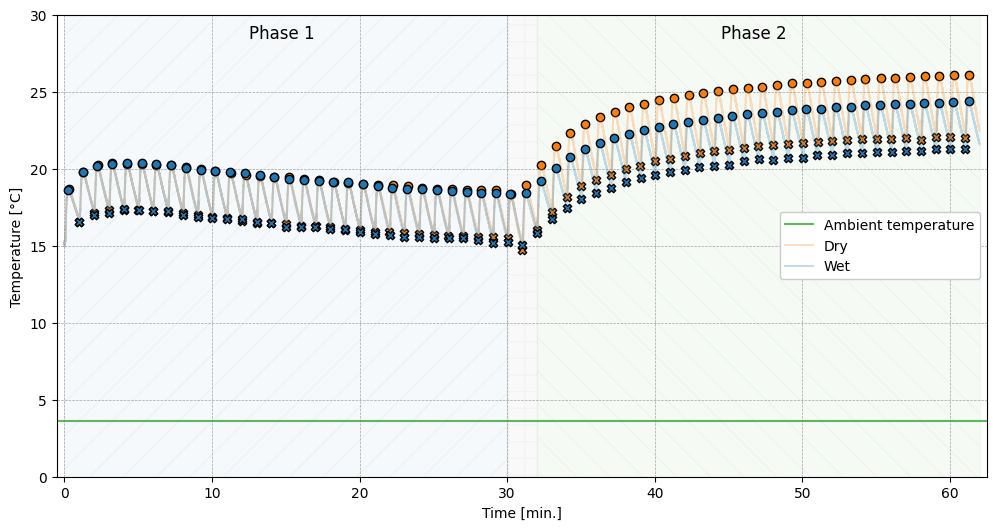

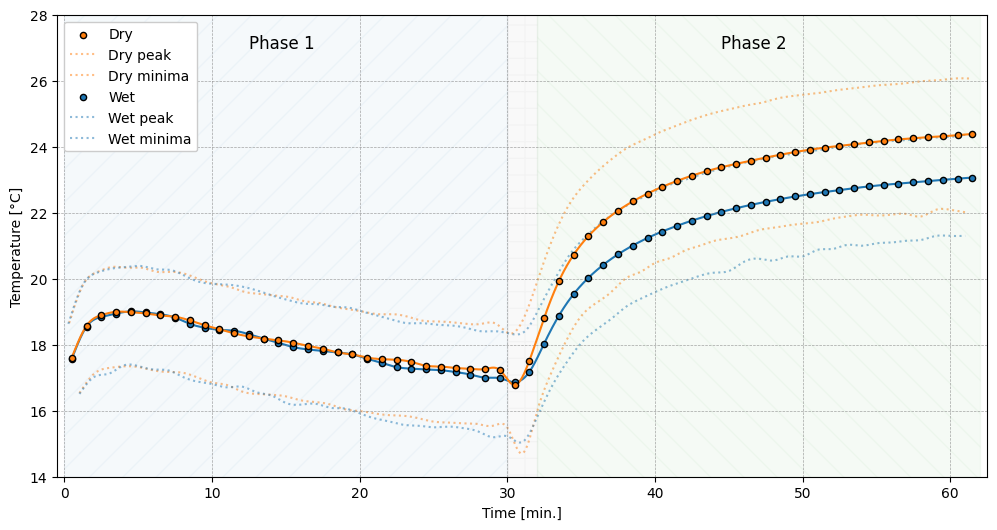

In [16]:
##########   Chest   ##########
Chest_TMP1D = df_1D['Channel 1']
Chest_TMP1W = df_1W['Channel 1']
Chest_TMP2D = df_2D['Channel 1']
Chest_TMP2W = df_2W['Channel 1']
Chest_TMP3D = df_3D['Channel 1']
Chest_TMP3W = df_3W['Channel 1']
Chest_TMP4D = df_4D['Channel 1']
Chest_TMP4W = df_4D['Channel 1']

Chest_min_length = min(len(Chest_TMP1D), len(Chest_TMP1W),
                        len(Chest_TMP2D), len(Chest_TMP3W),
                        len(Chest_TMP3D), len(Chest_TMP3W),
                        len(Chest_TMP4D), len(Chest_TMP4W)
                        )

Timestamps = [i * SamplingRate_minutes for i in range (0, Chest_min_length)]


Chest_TMP1D = Chest_TMP1D[:Chest_min_length]
Chest_TMP1W = Chest_TMP1W[:Chest_min_length]
Chest_TMP2D = Chest_TMP2D[:Chest_min_length]
Chest_TMP2W = Chest_TMP2W[:Chest_min_length]
Chest_TMP3D = Chest_TMP3D[:Chest_min_length]
Chest_TMP3W = Chest_TMP3W[:Chest_min_length]
Chest_TMP4D = Chest_TMP4D[:Chest_min_length]
Chest_TMP4W = Chest_TMP4W[:Chest_min_length]

#Define headers
headers = ['1D','2D','3D','4D','1W','2W','3W','4W']

#Create a dictionaries from the headers and sensor data
Chest_dict = {
    headers[0]: Chest_TMP1D,
    headers[1]: Chest_TMP2D,
    headers[2]: Chest_TMP3D,
    headers[3]: Chest_TMP4D,
    headers[4]: Chest_TMP1W,
    headers[5]: Chest_TMP2W,
    headers[6]: Chest_TMP3W,
    headers[7]: Chest_TMP4W, 
}

##########   List averages   ##########
Dry_Chest_averages = list_averages(min_length=Chest_min_length, dictionary=Chest_dict, headers=headers, start_header=0, end_header=4)
Wet_Chest_averages = list_averages(min_length=Chest_min_length, dictionary=Chest_dict, headers=headers, start_header=4, end_header=8)

##########   Local extrema   ##########
Dry_Chest_results = find_peaks_and_minima(Dry_Chest_averages, Timestamps, h=17.5, prom=2, dist=5000, h_min=-30, prom_min=2, dist_min=5000)
Wet_Chest_results = find_peaks_and_minima(Wet_Chest_averages, Timestamps, h=17.5, prom=2, dist=5000, h_min=-30, prom_min=2, dist_min=5000)

##########   Interval averages   ##########
Timestamps_interval_averages = interval_averages(data=Timestamps)
Dry_Chest_interval_averages = interval_averages(data=Dry_Chest_averages)
Wet_Chest_interval_averages = interval_averages(data=Wet_Chest_averages)

##########   Spline interpolation   ##########
    #Dry
DC_SI = Spline_Interpolation(list_timestamp=Timestamps_interval_averages, data_list=Dry_Chest_interval_averages, data_points=Interpolation_points)
DC_peak_SI = Spline_Interpolation(list_timestamp=Dry_Chest_results['peak_timestamps'], data_list=Dry_Chest_results['peak_temperatures'], data_points=Interpolation_points)
DC_min_SI = Spline_Interpolation(list_timestamp=Dry_Chest_results['minima_timestamps'], data_list=Dry_Chest_results['minima_temperatures'], data_points=Interpolation_points)
    #Wet
WC_SI = Spline_Interpolation(list_timestamp=Timestamps_interval_averages, data_list=Wet_Chest_interval_averages, data_points=Interpolation_points)
WC_peak_SI = Spline_Interpolation(list_timestamp=Wet_Chest_results['peak_timestamps'], data_list=Wet_Chest_results['peak_temperatures'], data_points=Interpolation_points)
WC_min_SI = Spline_Interpolation(list_timestamp=Wet_Chest_results['minima_timestamps'], data_list=Wet_Chest_results['minima_temperatures'], data_points=Interpolation_points)

##########   Plot   ##########
plot_template()
plt.plot(Timestamps, Dry_Chest_averages, label='Dry', color='tab:Orange', alpha=0.25)
plt.plot(Timestamps, Wet_Chest_averages, label='Wet', color='tab:Blue', alpha=0.25)
plt.scatter(Dry_Chest_results['peak_timestamps'], Dry_Chest_results['peak_temperatures'], color='tab:Orange', edgecolors='Black', zorder=1)
plt.scatter(Dry_Chest_results['minima_timestamps'], Dry_Chest_results['minima_temperatures'], 
            color='tab:Orange', edgecolors='Black', marker='X', zorder=1)
plt.scatter(Wet_Chest_results['peak_timestamps'], Wet_Chest_results['peak_temperatures'], color='tab:blue', edgecolors='Black', zorder=2)
plt.scatter(Wet_Chest_results['minima_timestamps'], Wet_Chest_results['minima_temperatures'], 
            color='tab:blue', edgecolors='Black', marker='X', zorder=2)
plt.legend(fancybox=True, facecolor='White', frameon=True, framealpha=1, loc='center right')

plot_template_zoom()
plt.scatter(Timestamps_interval_averages, Dry_Chest_interval_averages, label='Dry', color='tab:Orange', edgecolors='Black', s=20, zorder=4)
plt.plot(DC_SI['x_interp'], DC_SI['cubicBC'], color='tab:Orange', zorder=2)
plt.plot(DC_peak_SI['x_interp'], DC_peak_SI['cubicBC'], color='tab:Orange', linestyle=':', label='Dry peak', alpha=0.5, zorder=0)
plt.plot(DC_min_SI['x_interp'], DC_min_SI['cubicBC'], color='tab:Orange', linestyle=':', label='Dry minima', alpha=0.5, zorder=0)
plt.scatter(Timestamps_interval_averages, Wet_Chest_interval_averages, label='Wet', color='tab:Blue', edgecolors='Black', s=20, zorder=3)
plt.plot(WC_SI['x_interp'], WC_SI['cubicBC'], color='tab:Blue', zorder=1)
plt.plot(WC_peak_SI['x_interp'], WC_peak_SI['cubicBC'], color='tab:Blue', linestyle=':', label='Wet peak', alpha=0.5, zorder=0)
plt.plot(WC_min_SI['x_interp'], WC_min_SI['cubicBC'], color='tab:Blue', linestyle=':', label='Wet minima', alpha=0.5, zorder=0)
plt.legend(fancybox=True, facecolor='White', frameon=True, framealpha=1, loc='upper left')

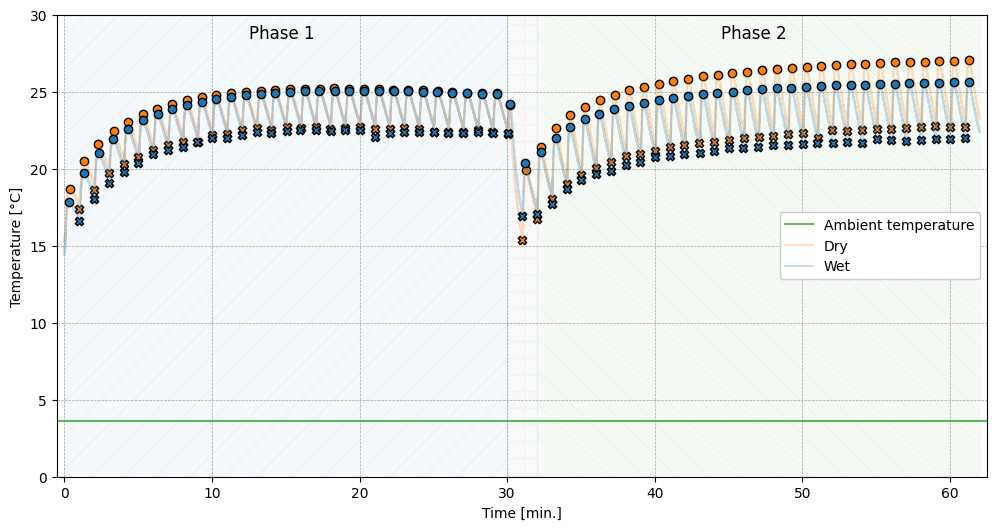

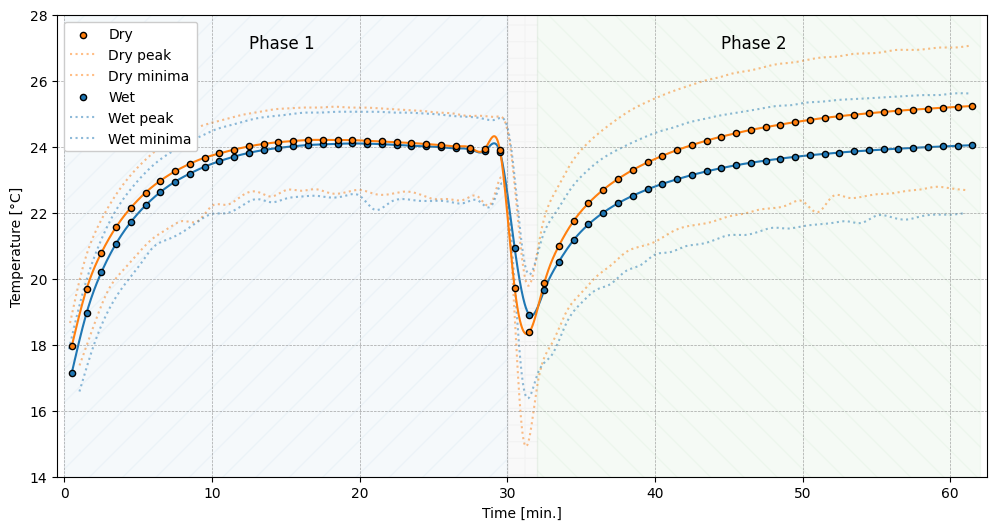

In [17]:
##########   Back   ##########

Back_TMP1D = df_1D['Channel 2']
Back_TMP1W = df_1W['Channel 2']
Back_TMP2D = df_2D['Channel 2']
Back_TMP2W = df_2W['Channel 2']
Back_TMP3D = df_3D['Channel 2']
Back_TMP3W = df_3W['Channel 2']
Back_TMP4D = df_4D['Channel 2']
Back_TMP4W = df_4D['Channel 2']

Back_min_length = min(len(Back_TMP1D), len(Back_TMP1W),
                      len(Back_TMP2D), len(Back_TMP3W),
                      len(Back_TMP3D), len(Back_TMP3W),
                      len(Back_TMP4D), len(Back_TMP4W)
                      )


Back_TMP1D = Back_TMP1D[:Back_min_length]
Back_TMP1W = Back_TMP1W[:Back_min_length]
Back_TMP2D = Back_TMP2D[:Back_min_length]
Back_TMP2W = Back_TMP2W[:Back_min_length]
Back_TMP3D = Back_TMP3D[:Back_min_length]
Back_TMP3W = Back_TMP3W[:Back_min_length]
Back_TMP4D = Back_TMP4D[:Back_min_length]
Back_TMP4W = Back_TMP4W[:Back_min_length]

#Define headers
headers = ['1D','2D','3D','4D','1W','2W','3W','4W']

#Create a dictionaries from the headers and sensor data
Back_dict = {
    headers[0]: Back_TMP1D,
    headers[1]: Back_TMP2D,
    headers[2]: Back_TMP3D,
    headers[3]: Back_TMP4D,
    headers[4]: Back_TMP1W,
    headers[5]: Back_TMP2W,
    headers[6]: Back_TMP3W,
    headers[7]: Back_TMP4W, 
}

##########   List averages   ##########
Dry_Back_averages = list_averages(min_length=Back_min_length, dictionary=Back_dict, headers=headers, start_header=0, end_header=4)
Wet_Back_averages = list_averages(min_length=Back_min_length, dictionary=Back_dict, headers=headers, start_header=4, end_header=8)

##########   Local extrema   ##########
Dry_Back_results = find_peaks_and_minima(Dry_Back_averages, Timestamps, h=17.5, prom=1, dist=5000, h_min=-30, prom_min=1, dist_min=5000)
Wet_Back_results = find_peaks_and_minima(Wet_Back_averages, Timestamps, h=17.5, prom=1, dist=5000, h_min=-30, prom_min=1, dist_min=5000)

##########   Interval averages   ##########
Dry_Back_interval_averages = interval_averages(data=Dry_Back_averages)
Wet_Back_interval_averages = interval_averages(data=Wet_Back_averages)

##########   Spline interpolation   ##########
    #Dry
DB_SI = Spline_Interpolation(list_timestamp=Timestamps_interval_averages, data_list=Dry_Back_interval_averages, data_points=Interpolation_points)
DB_peak_SI = Spline_Interpolation(list_timestamp=Dry_Back_results['peak_timestamps'], data_list=Dry_Back_results['peak_temperatures'], data_points=Interpolation_points)
DB_min_SI = Spline_Interpolation(list_timestamp=Dry_Back_results['minima_timestamps'], data_list=Dry_Back_results['minima_temperatures'], data_points=Interpolation_points)
    #Wet
WB_SI = Spline_Interpolation(list_timestamp=Timestamps_interval_averages, data_list=Wet_Back_interval_averages, data_points=Interpolation_points)
WB_peak_SI = Spline_Interpolation(list_timestamp=Wet_Back_results['peak_timestamps'], data_list=Wet_Back_results['peak_temperatures'], data_points=Interpolation_points)
WB_min_SI = Spline_Interpolation(list_timestamp=Wet_Back_results['minima_timestamps'], data_list=Wet_Back_results['minima_temperatures'], data_points=Interpolation_points)

##########   Plot   ##########
plot_template()

plt.plot(Timestamps, Dry_Back_averages, label='Dry', color='tab:orange', alpha=0.25)
plt.plot(Timestamps, Wet_Back_averages, label='Wet', color='tab:blue', alpha=0.25)
plt.scatter(Dry_Back_results['peak_timestamps'], Dry_Back_results['peak_temperatures'], color='tab:Orange', edgecolors='Black', zorder=1)
plt.scatter(Dry_Back_results['minima_timestamps'], Dry_Back_results['minima_temperatures'], 
            color='tab:Orange', edgecolors='Black', marker='X', zorder=1)
plt.scatter(Wet_Back_results['peak_timestamps'], Wet_Back_results['peak_temperatures'], color='tab:blue', edgecolors='Black', zorder=2)
plt.scatter(Wet_Back_results['minima_timestamps'], Wet_Back_results['minima_temperatures'], 
            color='tab:blue', edgecolors='Black', marker='X', zorder=2)
plt.legend(fancybox=True, facecolor='White', frameon=True, framealpha=1, loc='center right')

plot_template_zoom()
plt.scatter(Timestamps_interval_averages, Dry_Back_interval_averages, label='Dry', color='tab:Orange', edgecolors='Black', s=20, zorder=4)
plt.plot(DB_SI['x_interp'], DB_SI['cubicBC'], color='tab:Orange', zorder=2)
plt.plot(DB_peak_SI['x_interp'], DB_peak_SI['cubicBC'], color='tab:Orange', linestyle=':', label='Dry peak', alpha=0.5, zorder=0)
plt.plot(DB_min_SI['x_interp'], DB_min_SI['cubicBC'], color='tab:Orange', linestyle=':', label='Dry minima', alpha=0.5, zorder=0)
plt.scatter(Timestamps_interval_averages, Wet_Back_interval_averages, label='Wet', color='tab:Blue', edgecolors='Black', s=20, zorder=3)
plt.plot(WB_SI['x_interp'], WB_SI['cubicBC'], color='tab:Blue', zorder=1)
plt.plot(WB_peak_SI['x_interp'], WB_peak_SI['cubicBC'], color='tab:Blue', linestyle=':', label='Wet peak', alpha=0.5, zorder=0)
plt.plot(WB_min_SI['x_interp'], WB_min_SI['cubicBC'], color='tab:Blue', linestyle=':', label='Wet minima', alpha=0.5, zorder=0)
plt.legend(fancybox=True, facecolor='White', frameon=True, framealpha=1, loc='upper left')

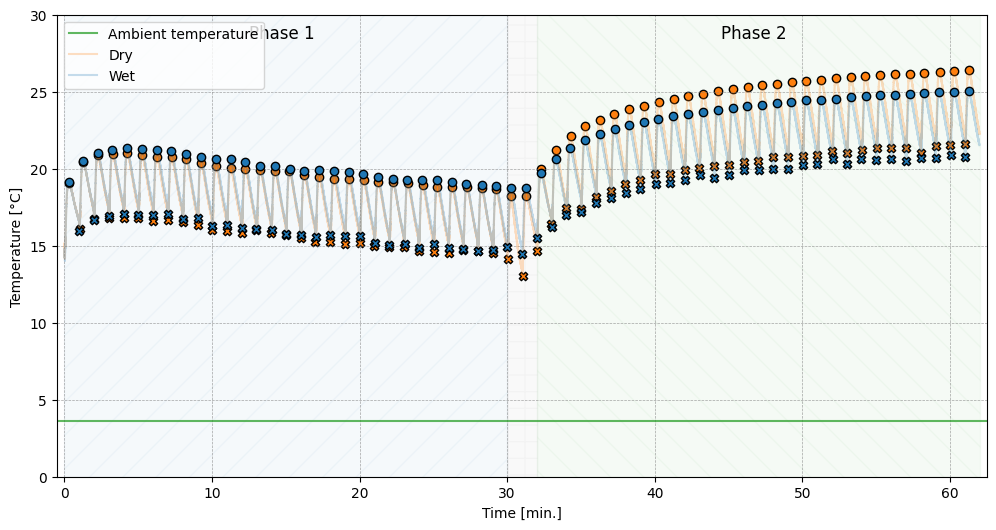

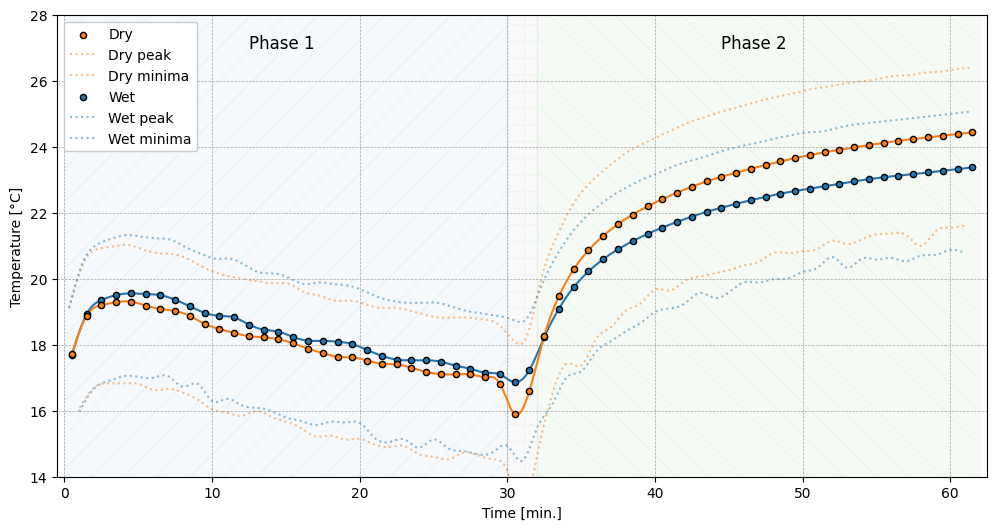

In [18]:
##########   Upper arm   ##########

Uarm_TMP1D = df_1D['Channel 3']
Uarm_TMP1W = df_1W['Channel 3']
Uarm_TMP2D = df_2D['Channel 3']
Uarm_TMP2W = df_2W['Channel 3']
Uarm_TMP3D = df_3D['Channel 3']
Uarm_TMP3W = df_3W['Channel 3']
Uarm_TMP4D = df_4D['Channel 3']
Uarm_TMP4W = df_4D['Channel 3']

Uarm_min_length = min(len(Uarm_TMP1D), len(Uarm_TMP1W),
                      len(Uarm_TMP2D), len(Uarm_TMP3W),
                      len(Uarm_TMP3D), len(Uarm_TMP3W),
                      len(Uarm_TMP4D), len(Uarm_TMP4W)
                      )


Uarm_TMP1D = Uarm_TMP1D[:Uarm_min_length]
Uarm_TMP1W = Uarm_TMP1W[:Uarm_min_length]
Uarm_TMP2D = Uarm_TMP2D[:Uarm_min_length]
Uarm_TMP2W = Uarm_TMP2W[:Uarm_min_length]
Uarm_TMP3D = Uarm_TMP3D[:Uarm_min_length]
Uarm_TMP3W = Uarm_TMP3W[:Uarm_min_length]
Uarm_TMP4D = Uarm_TMP4D[:Uarm_min_length]
Uarm_TMP4W = Uarm_TMP4W[:Uarm_min_length]

#Define headers
headers = ['1D','2D','3D','4D','1W','2W','3W','4W']

#Create a dictionaries from the headers and sensor data
Uarm_dict = {
    headers[0]: Uarm_TMP1D,
    headers[1]: Uarm_TMP2D,
    headers[2]: Uarm_TMP3D,
    headers[3]: Uarm_TMP4D,
    headers[4]: Uarm_TMP1W,
    headers[5]: Uarm_TMP2W,
    headers[6]: Uarm_TMP3W,
    headers[7]: Uarm_TMP4W, 
}

##########   List averages   ##########
Dry_Uarm_averages = list_averages(min_length=Uarm_min_length, dictionary=Uarm_dict, headers=headers, start_header=0, end_header=4)
Wet_Uarm_averages = list_averages(min_length=Uarm_min_length, dictionary=Uarm_dict, headers=headers, start_header=4, end_header=8)

##########   Local extrema   ##########
Dry_Uarm_results = find_peaks_and_minima(Dry_Uarm_averages, Timestamps, h=17.5, prom=2, dist=5000, h_min=-30, prom_min=2, dist_min=5000)
Wet_Uarm_results = find_peaks_and_minima(Wet_Uarm_averages, Timestamps, h=17.5, prom=2, dist=5000, h_min=-30, prom_min=2, dist_min=5000)

##########   Interval averages   ##########
Dry_Uarm_interval_averages = interval_averages(data=Dry_Uarm_averages)
Wet_Uarm_interval_averages = interval_averages(data=Wet_Uarm_averages)

##########   Spline interpolation   ##########
    #Dry
DUa_SI = Spline_Interpolation(list_timestamp=Timestamps_interval_averages, data_list=Dry_Uarm_interval_averages, data_points=Interpolation_points)
DUa_peak_SI = Spline_Interpolation(list_timestamp=Dry_Uarm_results['peak_timestamps'], data_list=Dry_Uarm_results['peak_temperatures'], data_points=Interpolation_points)
DUa_min_SI = Spline_Interpolation(list_timestamp=Dry_Uarm_results['minima_timestamps'], data_list=Dry_Uarm_results['minima_temperatures'], data_points=Interpolation_points)
    #Wet
WUa_SI = Spline_Interpolation(list_timestamp=Timestamps_interval_averages, data_list=Wet_Uarm_interval_averages, data_points=Interpolation_points)
WUa_peak_SI = Spline_Interpolation(list_timestamp=Wet_Uarm_results['peak_timestamps'], data_list=Wet_Uarm_results['peak_temperatures'], data_points=Interpolation_points)
WUa_min_SI = Spline_Interpolation(list_timestamp=Wet_Uarm_results['minima_timestamps'], data_list=Wet_Uarm_results['minima_temperatures'], data_points=Interpolation_points)

##########   Plot   ##########
plot_template()

plt.plot(Timestamps, Dry_Uarm_averages, label='Dry', color='tab:orange', alpha=0.25)
plt.plot(Timestamps, Wet_Uarm_averages, label='Wet', color='tab:blue', alpha=0.25)
plt.scatter(Dry_Uarm_results['peak_timestamps'], Dry_Uarm_results['peak_temperatures'], color='tab:Orange', edgecolors='Black', zorder=1)
plt.scatter(Dry_Uarm_results['minima_timestamps'], Dry_Uarm_results['minima_temperatures'], 
            color='tab:Orange', edgecolors='Black', marker='X', zorder=1)
plt.scatter(Wet_Uarm_results['peak_timestamps'], Wet_Uarm_results['peak_temperatures'], color='tab:blue', edgecolors='Black', zorder=2)
plt.scatter(Wet_Uarm_results['minima_timestamps'], Wet_Uarm_results['minima_temperatures'], 
            color='tab:blue', edgecolors='Black', marker='X', zorder=2)
plt.legend(fancybox=True, facecolor='White', frameon=True, framealpha=1, loc='center right')

plot_template_zoom()
plt.scatter(Timestamps_interval_averages, Dry_Uarm_interval_averages, label='Dry', color='tab:Orange', edgecolors='Black', s=20, zorder=4)
plt.plot(DUa_SI['x_interp'], DUa_SI['cubicBC'], color='tab:Orange', zorder=2)
plt.plot(DUa_peak_SI['x_interp'], DUa_peak_SI['cubicBC'], color='tab:Orange', linestyle=':', label='Dry peak', alpha=0.5, zorder=0)
plt.plot(DUa_min_SI['x_interp'], DUa_min_SI['cubicBC'], color='tab:Orange', linestyle=':', label='Dry minima', alpha=0.5, zorder=0)
plt.scatter(Timestamps_interval_averages, Wet_Uarm_interval_averages, label='Wet', color='tab:Blue', edgecolors='Black', s=20, zorder=3)
plt.plot(WUa_SI['x_interp'], WUa_SI['cubicBC'], color='tab:Blue', zorder=1)
plt.plot(WUa_peak_SI['x_interp'], WUa_peak_SI['cubicBC'], color='tab:Blue', linestyle=':', label='Wet peak', alpha=0.5, zorder=0)
plt.plot(WUa_min_SI['x_interp'], WUa_min_SI['cubicBC'], color='tab:Blue', linestyle=':', label='Wet minima', alpha=0.5, zorder=0)
plt.legend(fancybox=True, facecolor='White', frameon=True, framealpha=1, loc='upper left')

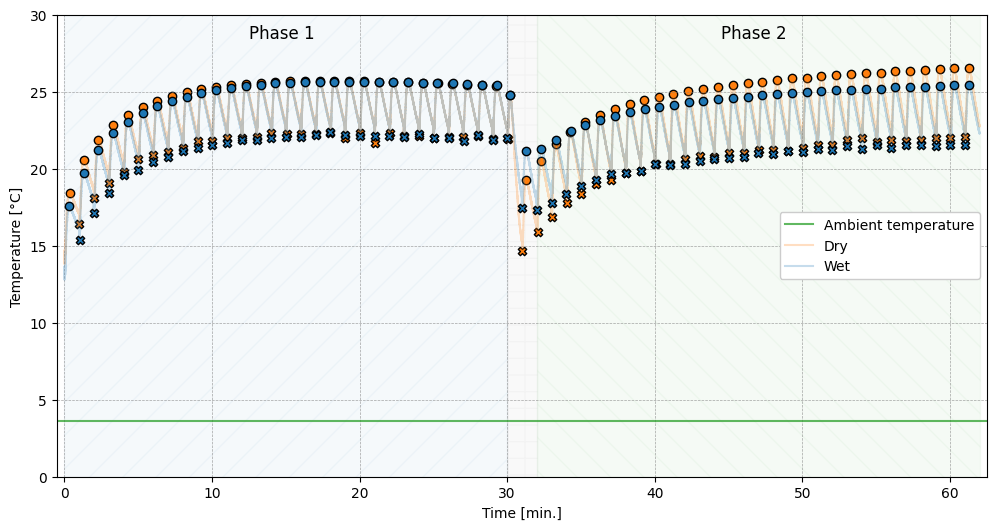

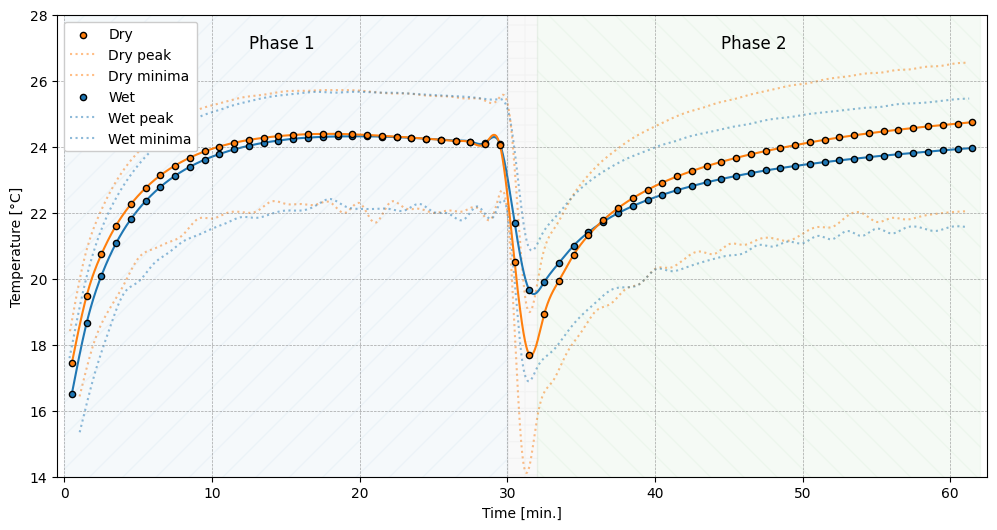

In [21]:
##########   Lower arm   ##########

Larm_TMP1D = df_1D['Channel 4']
Larm_TMP1W = df_1W['Channel 4']
Larm_TMP2D = df_2D['Channel 4']
Larm_TMP2W = df_2W['Channel 4']
Larm_TMP3D = df_3D['Channel 4']
Larm_TMP3W = df_3W['Channel 4']
Larm_TMP4D = df_4D['Channel 4']
Larm_TMP4W = df_4D['Channel 4']

Larm_min_length = min(len(Larm_TMP1D), len(Larm_TMP1W),
                      len(Larm_TMP2D), len(Larm_TMP3W),
                      len(Larm_TMP3D), len(Larm_TMP3W),
                      len(Larm_TMP4D), len(Larm_TMP4W)
                      )


Larm_TMP1D = Larm_TMP1D[:Larm_min_length]
Larm_TMP1W = Larm_TMP1W[:Larm_min_length]
Larm_TMP2D = Larm_TMP2D[:Larm_min_length]
Larm_TMP2W = Larm_TMP2W[:Larm_min_length]
Larm_TMP3D = Larm_TMP3D[:Larm_min_length]
Larm_TMP3W = Larm_TMP3W[:Larm_min_length]
Larm_TMP4D = Larm_TMP4D[:Larm_min_length]
Larm_TMP4W = Larm_TMP4W[:Larm_min_length]

#Define headers
headers = ['1D','2D','3D','4D','1W','2W','3W','4W']

#Create a dictionaries from the headers and sensor data
Larm_dict = {
    headers[0]: Larm_TMP1D,
    headers[1]: Larm_TMP2D,
    headers[2]: Larm_TMP3D,
    headers[3]: Larm_TMP4D,
    headers[4]: Larm_TMP1W,
    headers[5]: Larm_TMP2W,
    headers[6]: Larm_TMP3W,
    headers[7]: Larm_TMP4W, 
}

##########   List averages   ##########
Dry_Larm_averages = list_averages(min_length=Larm_min_length, dictionary=Larm_dict, headers=headers, start_header=0, end_header=4)
Wet_Larm_averages = list_averages(min_length=Larm_min_length, dictionary=Larm_dict, headers=headers, start_header=4, end_header=8)

##########   Local extrema   ##########
Dry_Larm_results = find_peaks_and_minima(Dry_Larm_averages, Timestamps, h=17.5, prom=1, dist=5000, h_min=-30, prom_min=1, dist_min=5000)
Wet_Larm_results = find_peaks_and_minima(Wet_Larm_averages, Timestamps, h=17.5, prom=1, dist=5000, h_min=-30, prom_min=1, dist_min=5000)

##########   Interval averages   ##########
Dry_Larm_interval_averages = interval_averages(data=Dry_Larm_averages)
Wet_Larm_interval_averages = interval_averages(data=Wet_Larm_averages)

##########   Spline interpolation   ##########
    #Dry
DLa_SI = Spline_Interpolation(list_timestamp=Timestamps_interval_averages, data_list=Dry_Larm_interval_averages, data_points=Interpolation_points)
DLa_peak_SI = Spline_Interpolation(list_timestamp=Dry_Larm_results['peak_timestamps'], data_list=Dry_Larm_results['peak_temperatures'], data_points=Interpolation_points)
DLa_min_SI = Spline_Interpolation(list_timestamp=Dry_Larm_results['minima_timestamps'], data_list=Dry_Larm_results['minima_temperatures'], data_points=Interpolation_points)
    #Wet
WLa_SI = Spline_Interpolation(list_timestamp=Timestamps_interval_averages, data_list=Wet_Larm_interval_averages, data_points=Interpolation_points)
WLa_peak_SI = Spline_Interpolation(list_timestamp=Wet_Larm_results['peak_timestamps'], data_list=Wet_Larm_results['peak_temperatures'], data_points=Interpolation_points)
WLa_min_SI = Spline_Interpolation(list_timestamp=Wet_Larm_results['minima_timestamps'], data_list=Wet_Larm_results['minima_temperatures'], data_points=Interpolation_points)

##########   Plot   ##########
plot_template()
plt.plot(Timestamps, Dry_Larm_averages, label='Dry', color='tab:orange', alpha=0.25)
plt.plot(Timestamps, Wet_Larm_averages, label='Wet', color='tab:blue', alpha=0.25)
plt.scatter(Dry_Larm_results['peak_timestamps'], Dry_Larm_results['peak_temperatures'], color='tab:Orange', edgecolors='Black', zorder=1)
plt.scatter(Dry_Larm_results['minima_timestamps'], Dry_Larm_results['minima_temperatures'], 
            color='tab:Orange', edgecolors='Black', marker='X', zorder=1)
plt.scatter(Wet_Larm_results['peak_timestamps'], Wet_Larm_results['peak_temperatures'], color='tab:blue', edgecolors='Black', zorder=2)
plt.scatter(Wet_Larm_results['minima_timestamps'], Wet_Larm_results['minima_temperatures'], 
            color='tab:blue', edgecolors='Black', marker='X', zorder=2)
plt.legend(fancybox=True, facecolor='White', frameon=True, framealpha=1, loc='center right')

plot_template_zoom()
plt.scatter(Timestamps_interval_averages, Dry_Larm_interval_averages, label='Dry', color='tab:Orange', edgecolors='Black', s=20, zorder=4)
plt.plot(DLa_SI['x_interp'], DLa_SI['cubicBC'], color='tab:Orange', zorder=2)
plt.plot(DLa_peak_SI['x_interp'], DLa_peak_SI['cubicBC'], color='tab:Orange', linestyle=':', label='Dry peak', alpha=0.5, zorder=0)
plt.plot(DLa_min_SI['x_interp'], DLa_min_SI['cubicBC'], color='tab:Orange', linestyle=':', label='Dry minima', alpha=0.5, zorder=0)
plt.scatter(Timestamps_interval_averages, Wet_Larm_interval_averages, label='Wet', color='tab:Blue', edgecolors='Black', s=20, zorder=3)
plt.plot(WLa_SI['x_interp'], WLa_SI['cubicBC'], color='tab:Blue', zorder=1)
plt.plot(WLa_peak_SI['x_interp'], WLa_peak_SI['cubicBC'], color='tab:Blue', linestyle=':', label='Wet peak', alpha=0.5, zorder=0)
plt.plot(WLa_min_SI['x_interp'], WLa_min_SI['cubicBC'], color='tab:Blue', linestyle=':', label='Wet minima', alpha=0.5, zorder=0)
plt.legend(fancybox=True, facecolor='White', frameon=True, framealpha=1, loc='upper left')

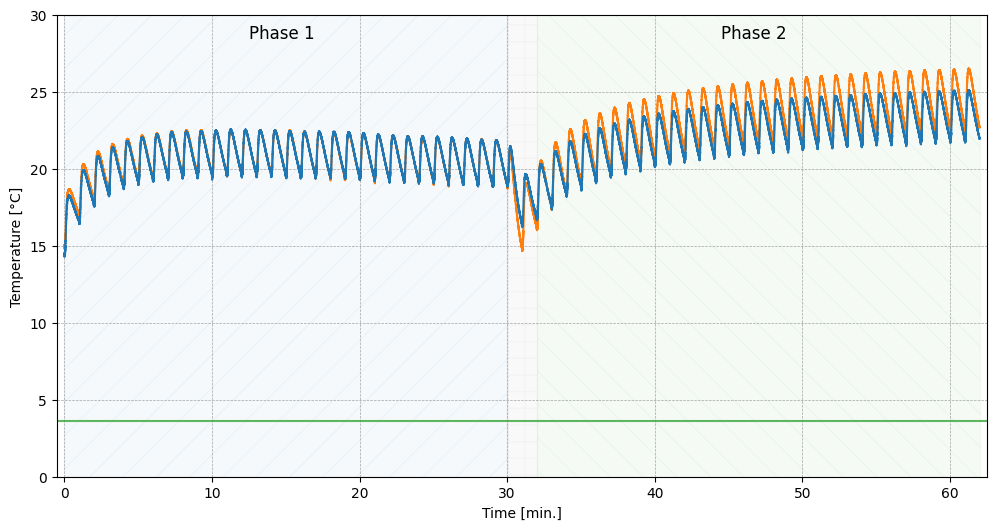

In [23]:
avg_headers = ['Dry Chest', 'Dry Back', 'Dry Uarm', 'Dry Larm', 'Wet Chest', 'Wet Back', 'Wet Uarm', 'Wet Larm']
#Dictionary for all the averages
Avg_dict = {
    avg_headers[0]: Dry_Chest_averages,
    avg_headers[1]: Dry_Back_averages,
    avg_headers[2]: Dry_Uarm_averages,
    avg_headers[3]: Dry_Larm_averages,
    avg_headers[4]: Wet_Chest_averages,
    avg_headers[5]: Wet_Back_averages,
    avg_headers[6]: Wet_Uarm_averages,
    avg_headers[7]: Wet_Larm_averages, 
}

##########   List averages   ##########
Dry_averages = list_averages(min_length=Chest_min_length, dictionary=Avg_dict, headers=avg_headers, start_header=0, end_header=4)
Wet_averages = list_averages(min_length=Chest_min_length, dictionary=Avg_dict, headers=avg_headers, start_header=4, end_header=8)

##########   Local extrema   ##########
Dry_results = find_peaks_and_minima(Dry_averages, Timestamps, h=17.5, prom=1, dist=5000, h_min=-30, prom_min=1, dist_min=5000)
Wet_results = find_peaks_and_minima(Wet_averages, Timestamps, h=17.5, prom=1, dist=5000, h_min=-30, prom_min=1, dist_min=5000)

##########   Interval averages   ##########
Dry_interval_averages = interval_averages(data=Dry_averages)
Wet_interval_averages = interval_averages(data=Wet_averages)

##########   Spline interpolation   ##########
    #Dry
Dry_SI = Spline_Interpolation(list_timestamp=Timestamps_interval_averages, data_list=Dry_interval_averages, data_points=Interpolation_points)
Dry_peak_SI = Spline_Interpolation(list_timestamp=Dry_results['peak_timestamps'], data_list=Dry_results['peak_temperatures'], data_points=Interpolation_points)
Dry_min_SI = Spline_Interpolation(list_timestamp=Dry_results['minima_timestamps'], data_list=Dry_results['minima_temperatures'], data_points=Interpolation_points)
    #Wet
Wet_SI = Spline_Interpolation(list_timestamp=Timestamps_interval_averages, data_list=Wet_interval_averages, data_points=Interpolation_points)
Wet_peak_SI = Spline_Interpolation(list_timestamp=Wet_results['peak_timestamps'], data_list=Wet_results['peak_temperatures'], data_points=Interpolation_points)
Wet_min_SI = Spline_Interpolation(list_timestamp=Wet_results['minima_timestamps'], data_list=Wet_results['minima_temperatures'], data_points=Interpolation_points)

##########   Plot   ##########
plot_template()
plt.plot(Timestamps, Dry_averages, label='Dry', color='tab:orange', alpha=0.25)
plt.plot(Timestamps, Wet_averages, label='Wet', color='tab:blue', alpha=0.25)
plt.scatter(Dry_Larm_results['peak_timestamps'], Dry_Larm_results['peak_temperatures'], color='tab:Orange', edgecolors='Black', zorder=1)
plt.scatter(Dry_Larm_results['minima_timestamps'], Dry_Larm_results['minima_temperatures'], 
            color='tab:Orange', edgecolors='Black', marker='X', zorder=1)
plt.scatter(Wet_Larm_results['peak_timestamps'], Wet_Larm_results['peak_temperatures'], color='tab:blue', edgecolors='Black', zorder=2)
plt.scatter(Wet_Larm_results['minima_timestamps'], Wet_Larm_results['minima_temperatures'], 
            color='tab:blue', edgecolors='Black', marker='X', zorder=2)
plt.legend(fancybox=True, facecolor='White', frameon=True, framealpha=1, loc='center right')

plot_template_zoom()
plt.scatter(Timestamps_interval_averages, Dry_Larm_interval_averages, label='Dry', color='tab:Orange', edgecolors='Black', s=20, zorder=4)
plt.plot(DLa_SI['x_interp'], DLa_SI['cubicBC'], color='tab:Orange', zorder=2)
plt.plot(DLa_peak_SI['x_interp'], DLa_peak_SI['cubicBC'], color='tab:Orange', linestyle=':', label='Dry peak', alpha=0.5, zorder=0)
plt.plot(DLa_min_SI['x_interp'], DLa_min_SI['cubicBC'], color='tab:Orange', linestyle=':', label='Dry minima', alpha=0.5, zorder=0)
plt.scatter(Timestamps_interval_averages, Wet_Larm_interval_averages, label='Wet', color='tab:Blue', edgecolors='Black', s=20, zorder=3)
plt.plot(WLa_SI['x_interp'], WLa_SI['cubicBC'], color='tab:Blue', zorder=1)
plt.plot(WLa_peak_SI['x_interp'], WLa_peak_SI['cubicBC'], color='tab:Blue', linestyle=':', label='Wet peak', alpha=0.5, zorder=0)
plt.plot(WLa_min_SI['x_interp'], WLa_min_SI['cubicBC'], color='tab:Blue', linestyle=':', label='Wet minima', alpha=0.5, zorder=0)
plt.legend(fancybox=True, facecolor='White', frameon=True, framealpha=1, loc='upper left')

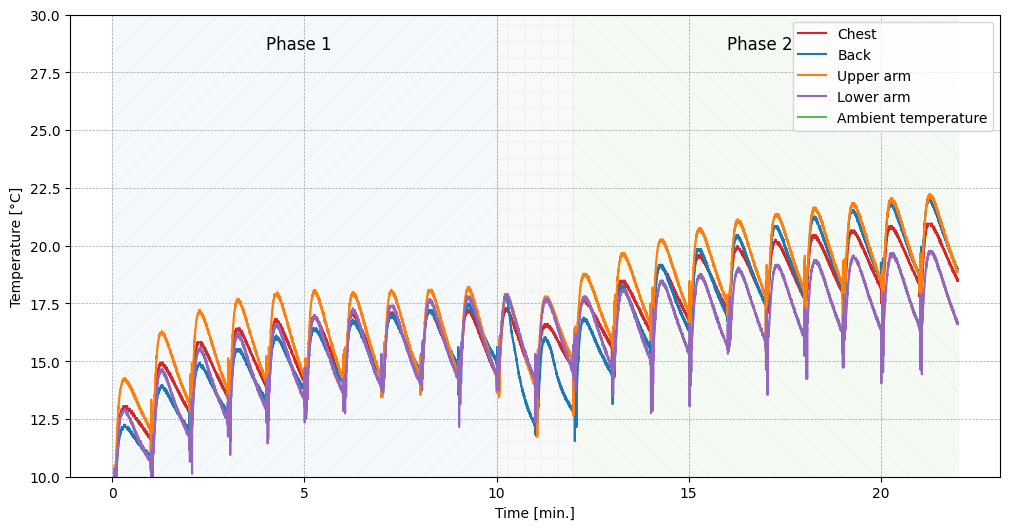

In [20]:
##########   Floor without sleeping mat   ##########

df_Floor = pd.read_csv('Test data/Floor-without-sleeping_mat.csv')

#Define headers
headers = ['Chest','Back','Uarm','Larm']

#Create a dictionaries from the headers and sensor data
Floor_dict = {
    headers[0]: df_Floor['Channel 1'],
    headers[1]: df_Floor['Channel 2'],
    headers[2]: df_Floor['Channel 3'],
    headers[3]: df_Floor['Channel 4']
}
Floor_Timestamp = [i * SamplingRate_minutes for i in range (0, len(Floor_dict['Chest']))]


##########   Local extrema   ##########
#Floor_results = find_peaks_and_minima(Floor_averages, Timestamps, h=17.5, prom=2, dist=5000, h_min=-30, prom_min=2, dist_min=5000)

##########   Plot   ##########
plt.figure(figsize=(12,6))
plt.ylim(10, 30)
plt.xlabel('Time [min.]', fontsize='10')
plt.ylabel('Temperature [\u00b0C]', fontsize='10')
plt.plot(Floor_Timestamp, Floor_dict['Chest'], label='Chest', color='tab:Red')
plt.plot(Floor_Timestamp, Floor_dict['Back'], label='Back', color='tab:blue')
plt.plot(Floor_Timestamp, Floor_dict['Uarm'], label='Upper arm', color='tab:Orange')
plt.plot(Floor_Timestamp, Floor_dict['Larm'], label='Lower arm', color='tab:Purple')
plt.axhline(y=AmbientTemp, label='Ambient temperature', color='tab:Green', linestyle='-', alpha=0.75)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7, color='gray', axis='both', which='both', zorder=0)
plt.axvspan(0, 10, color='tab:Blue', alpha=0.045, hatch='/')
plt.axvspan(10, 12, color='tab:Gray', alpha=0.045, hatch='+')
plt.axvspan(12, 22, color='tab:Green', alpha=0.045, hatch='\\')
#Adding text inside a rectangular box by using the keyword 'bbox'
plt.text(4, 28.5, 'Phase 1', fontsize = 'large')
plt.text(16, 28.5, 'Phase 2', fontsize = 'large')
plt.legend()